In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv("C:\\Users\\rahul\\Downloads\\Attrition Data.csv")

In [8]:
df

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9


#Question 1: For different departments find the mean age of the employees who have left the company.

In [71]:
df[df.Attrition=="Yes"].groupby(["Department"])[("Age")].mean().reset_index()

,Department,Age
0,Human Resources,30.083333
1,Research & Development,33.473684
2,Sales,34.260870


#Question 2: For different departments find the distance from home which is covered by the maximum number of employees to get to the company. ( Hint: Use Mode)

In [131]:
df.groupby(['Department'])[('DistanceFromHome')].agg(pd.Series.mode).to_frame()

,DistanceFromHome
Department,
Human Resources,2
Research & Development,1
Sales,2


#Question 3:The company wants to compare the average salary of employees who have left the job and those who haven’t. 
#Do the analysis for different Departments.

In [70]:
df.groupby(["Department",'Attrition'])[("MonthlyIncome")].mean().reset_index()

,Department,Attrition,MonthlyIncome
0,Human Resources,No,7345.980392
1,Human Resources,Yes,3715.750000
2,Research & Development,No,6630.326087
3,Research & Development,Yes,4108.075188
4,Sales,No,7232.240113
5,Sales,Yes,5908.456522


Question 4:The company wants to analyze the median of job satisfaction ratings for different marital statuses.


In [88]:
df.groupby(["MaritalStatus"])[("JobSatisfaction")].median().to_frame()

,JobSatisfaction
MaritalStatus,
Divorced,3.0
Married,3.0
Single,3.0


In [78]:
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

#Question 5: Find the mean of environment satisfaction rating for the employees with different Education Field.

In [89]:
df.groupby(["EducationField"])[("EnvironmentSatisfaction")].mean().to_frame()

,EnvironmentSatisfaction
EducationField,
Human Resources,2.666667
Life Sciences,2.689769
Marketing,2.723270
Medical,2.687500
Other,3.012195
Technical Degree,2.818182


#Question 6: The company wants to know if the employees who have spent good number of years in their company are leaving the company or not. For that, they want to know the average year spent in the company by the employees in different departments.


In [132]:
df.groupby(['Department',"Attrition"])[("YearsAtCompany")].mean().to_frame()

YearsAtCompany
Department             Attrition                
Human Resources        No               7.960784
                       Yes              4.166667
Research & Development No               7.171498
                       Yes              4.954887
Sales                  No               7.745763
                       Yes              5.510870

#Question 7: Find the mean, median, and mode of work-life balance ratings for the employees who are married and are from the medical field.

In [95]:
df[(df.MaritalStatus=='Married')&(df.EducationField=="Medical")].describe().WorkLifeBalance['mean']

2.7666666666666666

In [137]:
df[(df.MaritalStatus=='Married')&(df.EducationField=="Medical")].WorkLifeBalance.agg(['mean','median'])

mean      2.766667
median    3.000000
Name: WorkLifeBalance, dtype: float64

In [134]:
df[(df.MaritalStatus=='Married')&(df.EducationField=="Medical")].WorkLifeBalance.mode()

0    3
Name: WorkLifeBalance, dtype: int64

#Question 8: Find the mean, median, and mode of the number of companies the employee has worked for before joining ABC for the employees whose monthly salary is greater than 3000 and are from Research & Development department.

In [138]:
df[(df.MonthlyIncome>3000)&(df.Department=="Research & Development")].NumCompaniesWorked.agg(['mean','median'])

mean      2.956061
median    2.000000
Name: NumCompaniesWorked, dtype: float64

In [129]:
df[(df.MonthlyIncome>3000)&(df.Department=="Research & Development")].NumCompaniesWorked.value_counts().head(1).index

Int64Index([1], dtype='int64')

In [130]:
df[(df.MonthlyIncome>3000)&(df.Department=="Research & Development")].NumCompaniesWorked.mode()

0    1
Name: NumCompaniesWorked, dtype: int64

#Question 9: Create a Correlation matrix as well as the correlation heatmap and find out the following correlation values:
9a.What is the correlation value between the monthly salary and the number of years the employee has worked in that company
9b.What is the correlation value between the monthly salary and the age of the employee.

In [140]:
import seaborn as sns

In [141]:
df.corr()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
Age,1.000000,-0.001686,0.208034,0.010146,-0.004892,0.497855,0.299635,-0.021490,0.311309
DistanceFromHome,-0.001686,1.000000,0.021042,-0.016075,-0.003669,-0.017014,-0.029251,-0.026556,0.009508
Education,0.208034,0.021042,1.000000,-0.027128,-0.011296,0.094961,0.126317,0.009819,0.069114
EnvironmentSatisfaction,0.010146,-0.016075,-0.027128,1.000000,-0.006784,-0.006259,0.012594,0.027627,0.001458
JobSatisfaction,-0.004892,-0.003669,-0.011296,-0.006784,1.000000,-0.007157,-0.055699,-0.019459,-0.003803
MonthlyIncome,0.497855,-0.017014,0.094961,-0.006259,-0.007157,1.000000,0.149515,0.030683,0.514285
NumCompaniesWorked,0.299635,-0.029251,0.126317,0.012594,-0.055699,0.149515,1.000000,-0.008366,-0.118421
WorkLifeBalance,-0.021490,-0.026556,0.009819,0.027627,-0.019459,0.030683,-0.008366,1.000000,0.012089
YearsAtCompany,0.311309,0.009508,0.069114,0.001458,-0.003803,0.514285,-0.118421,0.012089,1.000000


<AxesSubplot:>

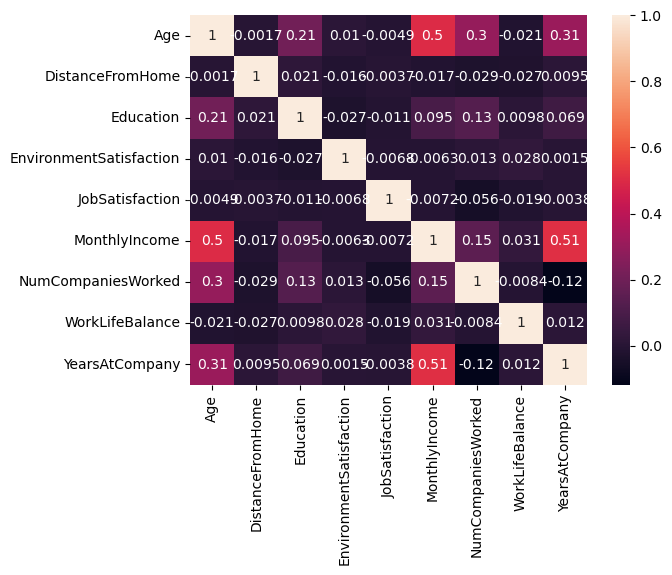

In [142]:
sns.heatmap(df.corr(),annot=True)

In [145]:
df.corr().MonthlyIncome['YearsAtCompany']

0.5142848257331957

In [149]:
df.corr().MonthlyIncome['Age']

0.4978545669265801

#Question 10: The company has a hypothesis that the attrition rate is higher for employees with low age. Comment on the same.

In [162]:
df.groupby(['Attrition'])[('Age')].agg(['median','mean'])

,median,mean
Attrition,,
No,36.0,37.561233
Yes,32.0,33.607595


# Since mean and median is close to smaller number. We can say that this hyphothesis is somewhat statistically supported.

Additional:

Create three different categories depending on the employee’s age. If the employee’s age is below 25 then the category would be “Fresher”. If the employee’s age is between 25 and 50 then “Intermediate” and if it is above 50 then “Expert”

Find the mean, median, mode, and standard deviation of the monthly salary for the employees in the above categories.

In [6]:
def new(x):
    if x<25:
        return "Fresher"
    elif x>=25 and x<=50:
        return 'Intermediate'
    else:
        return "Expert"

In [7]:
df['Category']=df['Age'].apply(lambda y:new(y))

In [8]:
df

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Category
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6,Intermediate
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10,Intermediate
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0,Intermediate
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8,Intermediate
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2,Intermediate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5,Intermediate
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7,Intermediate
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6,Intermediate
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9,Intermediate


In [174]:
df.groupby(['Category'])[('MonthlyIncome')].agg(['median','mean','std',pd.Series.mode]).reset_index()

,Category,median,mean,std,mode
0,Expert,10552.0,10574.881119,5918.049639,17328
1,Fresher,2610.0,2658.773196,890.087221,2323
2,Intermediate,4973.5,6332.682927,4388.634999,2342


In [176]:
import matplotlib.pyplot as plt

In [182]:
p=df.corr()

In [187]:
q=df[['Age','MonthlyIncome']].corr()

<AxesSubplot:>

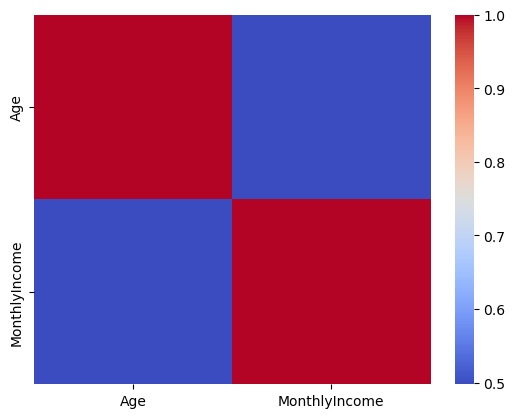

In [190]:
sns.heatmap(q,cmap='coolwarm')

<AxesSubplot:ylabel='Density'>

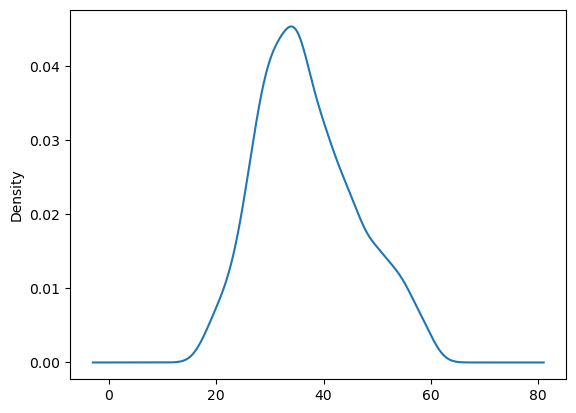

In [192]:
df.Age.plot.density()

In [193]:
mean=df.Age.mean()
std=df.Age.std()


In [216]:
df[(df.Age>=mean-std) & (df.Age<=mean+std)]

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Category
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6,Intermediate
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0,Intermediate
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8,Intermediate
5,32,No,Research & Development,2,2,Life Sciences,4,4,Single,3068,0,2,7,Intermediate
7,30,No,Research & Development,24,1,Life Sciences,4,3,Divorced,2693,1,3,1,Intermediate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,39,No,Sales,24,1,Marketing,2,4,Married,12031,0,2,20,Intermediate
1463,31,No,Research & Development,5,3,Medical,2,1,Single,9936,0,3,9,Intermediate
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5,Intermediate
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7,Intermediate


In [195]:
mean

36.923809523809524

In [196]:
std

9.135373489136734

In [197]:
df.Age.value_counts()

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

In [199]:
df.Age

0       41
1       49
2       37
3       33
4       27
        ..
1465    36
1466    39
1467    27
1468    49
1469    34
Name: Age, Length: 1470, dtype: int64

In [204]:
df[(df.Age>=mean-std)]

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Category
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6,Intermediate
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10,Intermediate
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0,Intermediate
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8,Intermediate
5,32,No,Research & Development,2,2,Life Sciences,4,4,Single,3068,0,2,7,Intermediate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,No,Research & Development,5,3,Medical,2,1,Single,9936,0,3,9,Intermediate
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5,Intermediate
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7,Intermediate
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9,Intermediate


In [205]:
df

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Category
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6,Intermediate
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10,Intermediate
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0,Intermediate
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8,Intermediate
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2,Intermediate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5,Intermediate
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7,Intermediate
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6,Intermediate
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9,Intermediate


In [210]:
df1=pd.read_csv("C:\\Users\\rahul\\Downloads\\wine.csv")

In [212]:
m=df1.chlorides.mean()

In [213]:
s=df1.chlorides.std()

In [217]:
len(df1[(df1.chlorides >=m-s) & (df1.chlorides <=m+s)])/len(df1)

0.9480925578486554

In [218]:
import scipy.stats as st

In [220]:
stat,p=st.shapiro(df1.pH)

In [221]:
p

1.7218767425219994e-06

In [223]:
if p<=0.05:
    print('pH does not fit (fail to reject the Null hypothesis) normal distribution')
else:
    print('pH fits the normal distribution')

pH does not fit (fail to reject the Null hypothesis) normal distribution


In [ ]:
st.shapiro